# HW 4 - Cancer and Diabeties analisys

## ECGR 5105 - Summer 2024

#### Joshua Ayers

#### SID: 801083470

#### Professor: Vinit Katariya

#### Github: https://github.com/Jayers0/HW4_ECGR5105

### Problem 1
Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

- 1. Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
- 2. Plot your classification accuracy, precision, and recall over a different number of Ks. 
- 3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
- 4. Compare your results against the logistic regression that you have done in homework 3.


In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#### Load the data

In [163]:

# Load dataset
cancer_df = pd.read_csv('Data/cancer.csv')
#cancer_df = cancer_df.drop("Unnamed: 32")
X_cancer = cancer_df.drop(columns=["diagnosis","id"])  
y_cancer = cancer_df["diagnosis"].apply(lambda x: 1 if x == 'M' else 0)  # using lamda function to change the data into a numeric type as i had training issues withe the 

# Standardize the features
scaler = StandardScaler()
X_scaled_cancer = scaler.fit_transform(X_cancer)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_cancer, y_cancer, test_size=0.2, random_state=42)


#### Scale the data

In [164]:
# Standardize the features
scaler = StandardScaler()
X_scaled_cancer = scaler.fit_transform(X_cancer)


#### Split the data

In [165]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_cancer, y_cancer, test_size=0.2, random_state=42)

#### Defining the SVM classifier

In [166]:


# Function to evaluate SVM with PCA
def evaluate_svm_with_pca(X_train, X_test, y_train, y_test, kernel):
    accuracies = []
    precisions = []
    recalls = []
    k_values = range(1, X_train.shape[1] + 1)
    
    for k in k_values:
        # Apply PCA
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Train SVM classifier
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_pca, y_train)
        
        # Predict and evaluate
        y_pred = svm.predict(X_test_pca)
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
    
    return k_values, accuracies, precisions, recalls

# Evaluate for different kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    k_values, accuracies, precisions, recalls = evaluate_svm_with_pca(X_train, X_test, y_train, y_test, kernel)
    results[kernel] = (k_values, accuracies, precisions, recalls)

### Problem 1 - Subpart 3

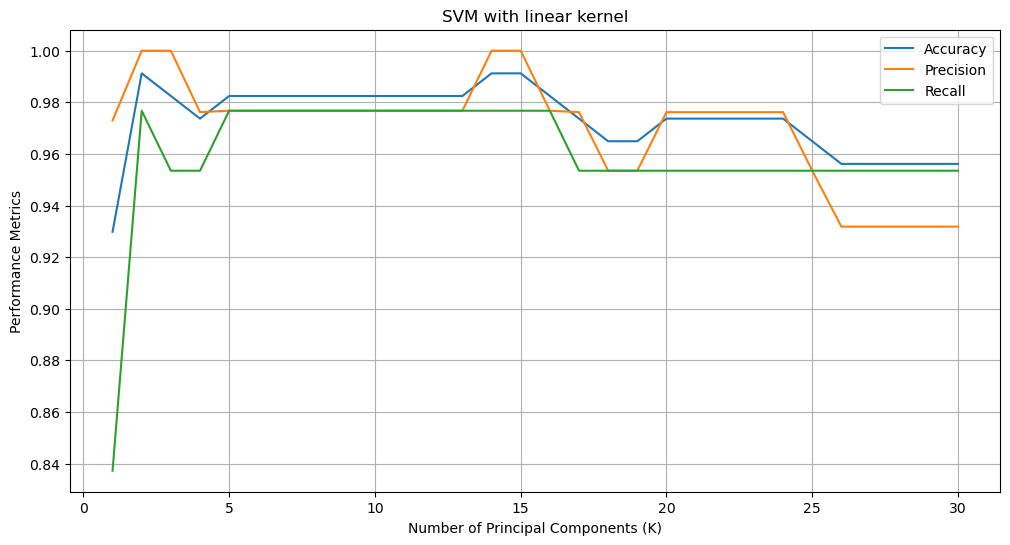

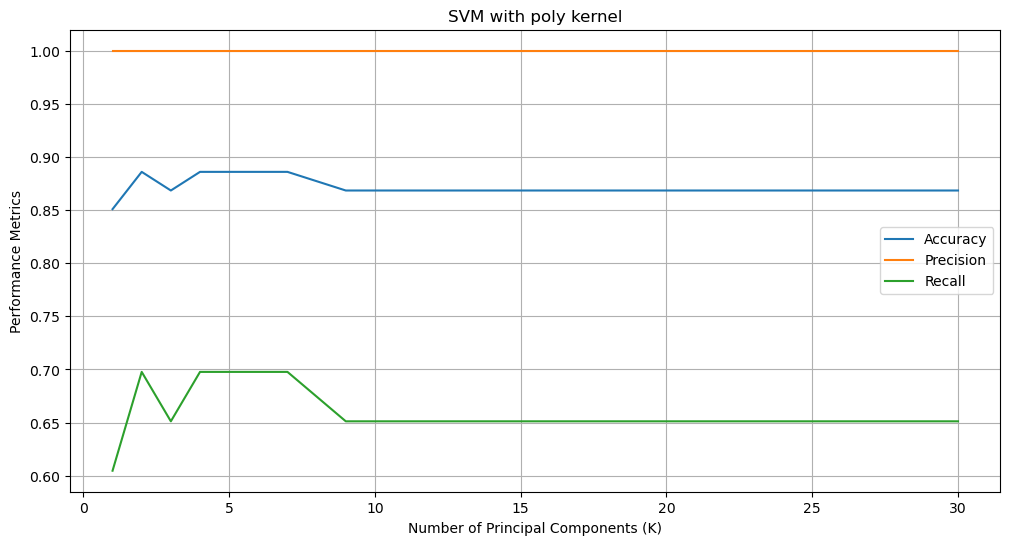

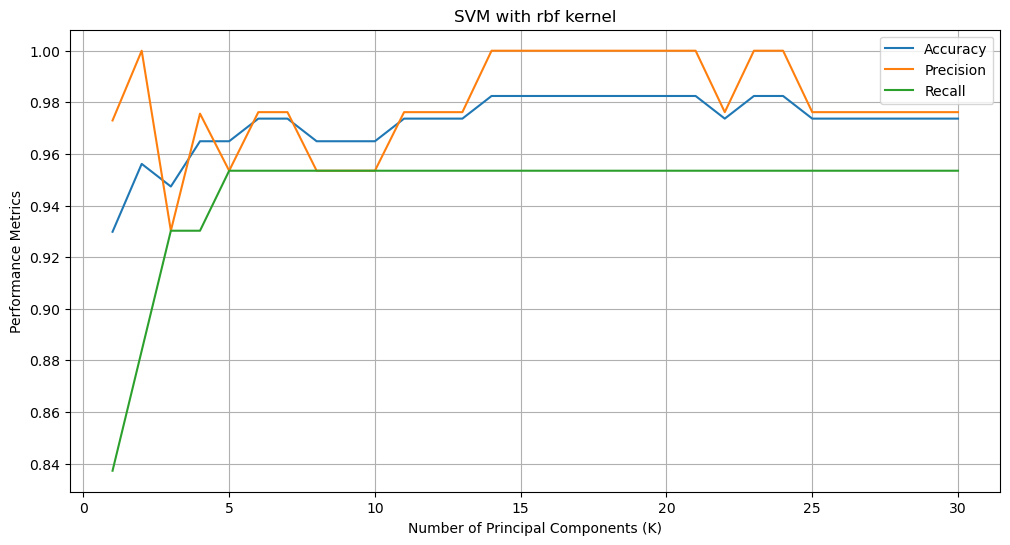

In [167]:
# Plot the results
for kernel in kernels:
    k_values, accuracies, precisions, recalls = results[kernel]
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, accuracies, label='Accuracy')
    plt.plot(k_values, precisions, label='Precision')
    plt.plot(k_values, recalls, label='Recall')
    plt.title(f'SVM with {kernel} kernel')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Performance Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Problem 4- Subpart 4

HW 3 logistic regression implementation

In [168]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization=None, lambda_=0.01):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.accuracy_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Compute loss and accuracy
            loss = self._compute_loss(y, y_predicted)
            accuracy = accuracy_score(y, [1 if i > 0.5 else 0 for i in y_predicted])
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Add regularization term to the gradient
            if self.regularization == 'l2':
                dw += (self.lambda_ / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.lambda_ / n_samples) * np.sign(self.weights)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _compute_loss(self, y_true, y_pred):
        n_samples = len(y_true)
        if self.regularization == 'l2':
            regularization_term = (self.lambda_ / (2 * n_samples)) * np.sum(self.weights**2)
        elif self.regularization == 'l1':
            regularization_term = (self.lambda_ / n_samples) * np.sum(np.abs(self.weights))
        else:
            regularization_term = 0
        return -1 / n_samples * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) + regularization_term

In [169]:
# Train the logistic regression model
log_reg = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg.fit(X_train, y_train)

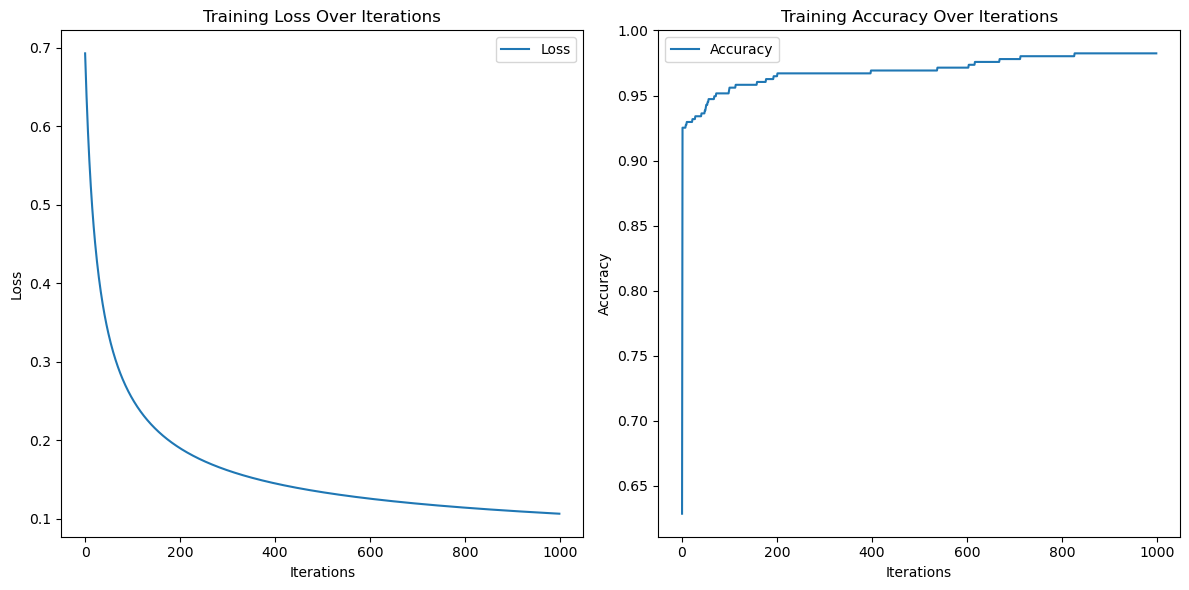

In [170]:
# Plot the training loss and accuracy over iterations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(log_reg.loss_history, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(log_reg.accuracy_history, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

In [171]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [172]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9912
Precision: 1.0000
Recall: 0.9767
F1 Score: 0.9882


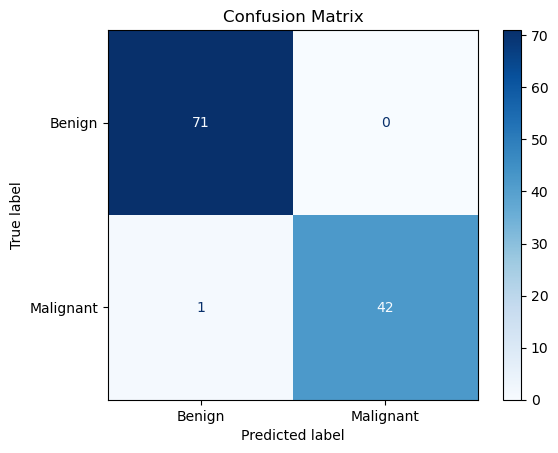

In [173]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Results:



### Problem 2
Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

- 1. Plot your regression model for SVR similar to the sample code provided on Canvas.
- 2. Compare your results against linear regression with regularization loss that you already did in assignment1. 
- 3. Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy. 
Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

#### load the Data

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


df = pd.read_csv('Data/Housing.csv') 
dfimport torch
import torch.nn as nn
import torch.optim as optim

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [175]:
# Preprocess the data
# Assuming 'price' is the target variable and others are features
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = df['price']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [176]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [177]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

### Subproblem 1

In [178]:
# Define the SVR model
class SVR(nn.Module):
    def __init__(self, input_dim):
        super(SVR, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.fc(x)

# Function to evaluate SVR with PCA
def evaluate_svr_with_pca(X_train, X_test, y_train, y_test, kernel):
    mses = []
    r2s = []
    k_values = range(1, X_train.shape[1] + 1)
    
    for k in k_values:
        # Apply PCA
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train_pca_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
        X_test_pca_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
        
        # Train SVR model
        model = SVR(input_dim=k)
        criterion = nn.MSELoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01)
        
        # Training loop
        for epoch in range(100):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_pca_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
        
        # Predict and evaluate
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test_pca_tensor).numpy()
        mses.append(mean_squared_error(y_test, y_pred))
        r2s.append(r2_score(y_test, y_pred))
    
    return k_values, mses, r2s

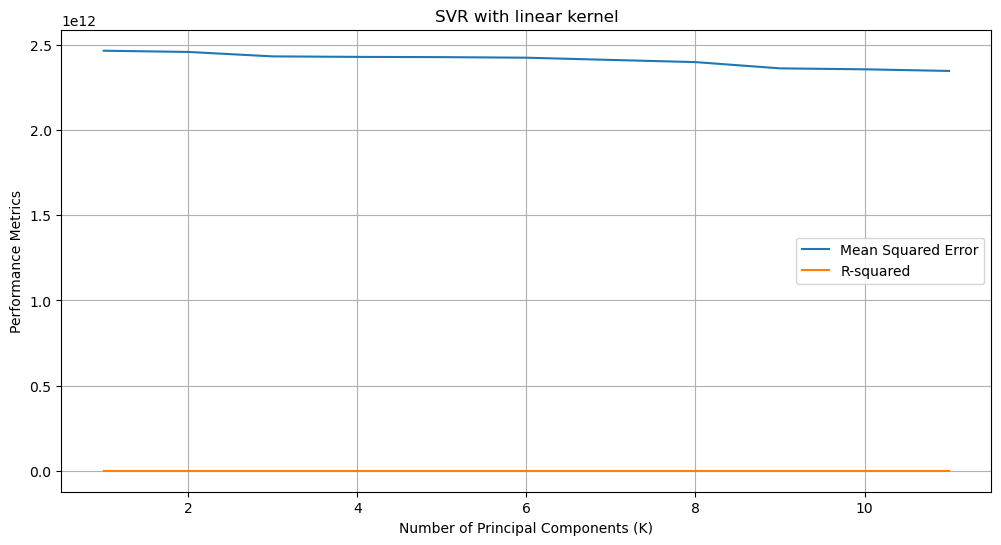

In [179]:
# Evaluate for different kernels (only linear kernel is implemented here, need kernel trick implementation for others)
kernels = ['linear']
results = {}

for kernel in kernels:
    k_values, mses, r2s = evaluate_svr_with_pca(X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, kernel)
    results[kernel] = (k_values, mses, r2s)

# Plot the results
for kernel in kernels:
    k_values, mses, r2s = results[kernel]
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, mses, label='Mean Squared Error')
    plt.plot(k_values, r2s, label='R-squared')
    plt.title(f'SVR with {kernel} kernel')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Performance Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()